# Занятие 2
# Прикладная алгебра и численные методы
## Метод наименьших квадратов, линейная регрессия
numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

scipy:
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg
import sympy
import matplotlib.pyplot as plt
from google.colab import files

## Задача 1 метод наименьших квадратов
$$
\left\{
\begin{matrix}
x - 5y = 4\\
-2x + 10y = -7
\end{matrix}
\right.
$$
Проверить СЛАУ на совместность.
Решить СЛАУ с помощью МНК.
Построить графики прямых, соответствующих уравнениям системы, отметить маркером псевдорешение.
Построить  график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-2, 0).
Отметить маркером на графике точку, соответствующую псевдорешению.
Найти минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-0.5, 1), сравнить с невязкой псевдорешения.


Вначале построим графики прямых, соответствующих уравнениям системы:

In [ ]:
A = np.array([[1, -5], [-2, 10]])
b = np.array([[4], [-7]])

# Используем теорему Кронекера - Капелли для проверки совместности
np.linalg.matrix_rank(np.hstack((A, b))) == np.linalg.matrix_rank(A)

False

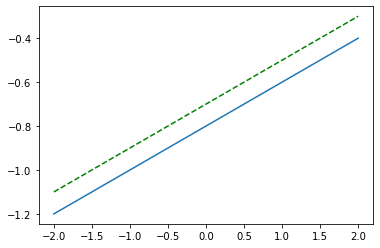

In [ ]:
x, y = sympy.symbols('x y')

X = [-2, 2]
Y1, Y2 = [[(b[i] - A[i, 0] * x) / A[i, 1] for x in X] for i in (0, 1)]
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')

Прямые параллельны, поскольку коэффициенты при переменных пропорциональны, проверим это:

In [ ]:
A[0, 0] / A[1, 0] == A[0, 1] / A[1, 1]

True

Найдем псевдорешение с помощью псевдообратной матрицы:

In [ ]:
sol = np.linalg.pinv(A) @ b
print(f'Псевдорешение\n{sol}')

Псевдорешение
[[ 0.13846154]
 [-0.69230769]]


Отметим на графике точку, соответствующую псевдорешению:

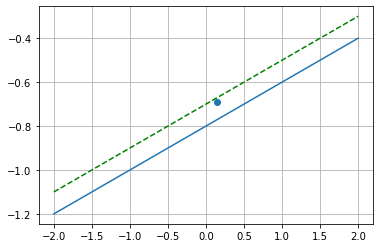

In [ ]:
plt.plot(X, Y1)
plt.plot(X, Y2, 'g--')
plt.scatter(*sol)
plt.grid(True)

*Опишем функцию вычисления невязки*

In [ ]:
def residual(A, b, sol):
  return np.linalg.norm(A @ sol - b)

Построим график зависимости невязки от координат $x$ и $y$ вектора в диапазоне (-2, 0) и отметим на нем точку, соответствующую псевдорешению:

Text(0.5, 0, 'Z')

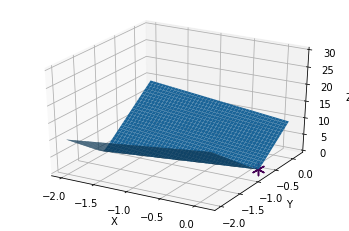

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2, 0.15, 0.01)
xlen = len(X)
Y = np.arange(-2, 0.15, 0.01)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(ylen):
    for j in range(xlen):
        Z[i, j] = residual(A, b, np.array([[X[i, j]], [Y[i, j]]]))
ax.plot_surface(X, Y, Z)
ax.set_zlim(0, 30)
ax.scatter(*sol, residual(A, b, sol), c=8, s=150, marker=(6, 2))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Найдем минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-0.5, 1):

In [ ]:
X = np.arange(-1, 1, 0.01)
xlen = len(X)
Y = np.arange(-1, 1, 0.01)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(ylen):
    for j in range(xlen):
        Z[i, j] = residual(A, b, np.array([[X[i, j]], [Y[i, j]]]))

min_res = min([min(zz) for zz in Z])
min_res

0.4472135954999579

### Задача 2
$$
\left\{
\begin{matrix}
2x + 3y - z = 5\\
3x - 2y + z = 2\\
5x + y = 0
\end{matrix}
\right.
$$
Проверить СЛАУ на совместность.
Решить СЛАУ с помощью МНК.
Найдти минимальное значение невязки для координат  $x$ и $y$ вектора в диапазоне (-1, 1), сравнить с невязкой псевдорешения.

In [ ]:
A = np.array([[2, 3, -1], [3, -2, 1], [5, 1, 0]])
b = np.array([[5], [2], [0]])

Проверим на совместность:

In [ ]:
np.linalg.matrix_rank(np.hstack((A, b))) == np.linalg.matrix_rank(A)

False

Найдем псевдорешение с помощью псевдообратной матрицы:

In [ ]:
sol = np.linalg.pinv(A) @ b
sol

array([[ 0.34871795],
       [ 0.58974359],
       [-0.2       ]])

Найдем минимальное значение невязки для координат  $x$, $y$ и $z$ вектора в диапазоне (-1, 1):

In [ ]:
X = np.arange(-1, 1, 0.05)
xlen = len(X)
Y = np.arange(-1, 1, 0.05)
ylen = len(Y)
Z = np.arange(-1, 1, 0.05)
zlen = len(Z)
X, Y, Z = np.meshgrid(X, Y, Z)
min_res = residual(A, b, np.array([[1], [1], [1]]))
for i in range(ylen):
  for j in range(xlen):
    for k in range(zlen):
      curr = residual(A, b, np.array([[X[i, j, k]], [Y[i, j, k]], [Z[i, j, k]]]))
      if(min_res > curr):
        min_res = curr
min_res

4.0416580755922435

**Загрузка файлов в colab.research**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  print(f'Загружен файл "{fn}"')

Saving sem3_corona2020.xlsx to sem3_corona2020.xlsx
Загружен файл "sem3_corona2020.xlsx"


## Задача 3 линейная регрессия
Считать данные из файла sem3_corona2020.xlsx.

Найти коэффициенты $k$ и $b$ линейной регрессии $Q = kt+b$, если:

a) $t$ представляет собой столбец 2, $Q$ - столбец 1

b) $t$ представляет собой столбец 3, $Q$ - столбец 1

c) $t$ представляет собой столбец 4, $Q$ - столбец 1

d) $t$ представляет собой столбец 5, $Q$ - столбец 4

e) $t$ представляет собой столбец 6, $Q$ - столбец 4

f) $t$ представляет собой столбец 1, $Q$ - столбец 4

Построить все графики регрессии в одной координатной плоскости, отметить на них маркерами данные.

Построить на отдельном общем графике c) и f).

In [ ]:
#fn = 'sem3_corona2020.xlsx'
rexcel = pd.read_excel(fn, index_col=0, skiprows=[0, 1, 2, 3, 4, 5, 103], dtype={'Name': str, 'Value': int})  
rexcel[:5]

,1,2,3,4,5,6
A,,,,,,
Российская Федерация,7444.0,5644.0,1800.0,5008.0,1530.0,3478.0
Центральный федеральный округ,4994.0,3760.0,1234.0,3268.0,1127.0,2141.0
Белгородская область,26.0,24.0,2.0,14.0,4.0,10.0
Брянская область,20.0,20.0,0.0,129.0,10.0,119.0
Владимирская область,35.0,35.0,0.0,0.0,0.0,0.0


*Зададим процедуру, вычисляющую значения k и b и строющую график регрессии*

In [ ]:
def calculate_and_draw(index1, index2):
  Qv = rexcel.values[:96, index1]
  Av = rexcel.values[:96, index2]
  nA = len(Av)
  Q = np.reshape(Qv, (nA, 1))
  A = np.reshape(Av, (nA, 1))
  A1 = np.hstack((A, np.ones((nA, 1))))
  res = np.linalg.pinv(A1) @ Q
  k, b = res[:, 0]
  display('k', k, 'b', b)
  X = np.array([min(Av), max(Av)])
  Y = k * X + b
  plt.plot(X, Y)
  plt.plot(Av, Qv, ' ', marker=(5, 2))

'k'

1.3134109156080949

'b'

1.1293412721940648

'k'

4.031897515722523

'b'

5.37387689764455

'k'

1.436626906445003

'b'

7.976131975599973

'k'

3.034212846669554

'b'

11.612416349514515

'k'

1.474405154751611

'b'

-3.8356950938682246

'k'

0.6771561856676542

'b'

-1.138198858317221

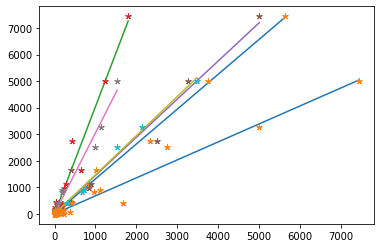

In [ ]:
Q_column_index = [1, 1, 1, 4, 4, 4]
t_column_index = [2, 3, 4, 5, 6, 1]
for i in range(6):
  calculate_and_draw(Q_column_index[i] - 1, t_column_index[i] - 1)

'k'

1.436626906445003

'b'

7.976131975599973

'k'

0.6771561856676542

'b'

-1.138198858317221

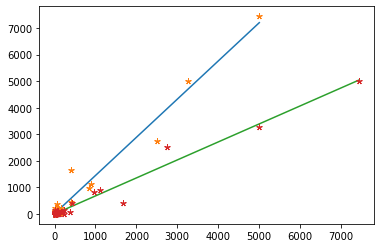

In [ ]:
Q_column_index = [1, 4]
t_column_index = [4, 1]
for i in range(2):
  calculate_and_draw(Q_column_index[i] - 1, t_column_index[i] - 1)

## Задача 4 линейная регрессия
Для а) Задачи 3 исключить из рассмотрения данные, в которых $t> 1000$, $Q>1000$,
построить на одном графике новую и старую линии регрессии, отметить маркерами все данные, кроме исключенных.

92

91

'k'

0.671556698730632

'b'

17.583883758572277

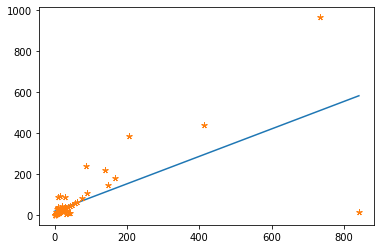

In [ ]:
Qv_d = rexcel.values[:96, 0]
Av_d = rexcel.values[:96, 1]
i = 0;
Qv = []
Av = []
while(i < 96):
  q = Qv_d[i]
  a = Av_d[i]
  if(q <= 1000):
    Qv.append(q)
  if(a <= 1000):
    Av.append(a)
  i += 1
display(len(Av), len(Qv))
Av.pop(0)
nA = len(Av)
Q = np.reshape(Qv, (nA, 1))
A = np.reshape(Av, (nA, 1))
A1 = np.hstack((A, np.ones((nA, 1))))
res = np.linalg.pinv(A1) @ Q
k, b = res[:, 0]
display('k', k, 'b', b)
X = np.array([min(Av), max(Av)])
Y = k * X + b
plt.plot(X, Y)
plt.plot(Av, Qv, ' ', marker=(5, 2))

